## Prueba 2: Analizado los crímenes en la Ciudad de Nueva York

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones y detenciones realizadas por le departamento de policia de NY en la vía pública. El diccionario de atributos se encuentra en el archivo 2009 SQF File Spec.xlsx.

Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo del  de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumén de datos reales.

* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivos auxiliares y csv). 
* Una vez terminada la prueba, comprime la carpeta y sube el .zip a la sección correspondiente.

## Hito 1: Preliminares y aspecto computacionales

El problema presentado es un problema de clasificación, donde se debe generar un modelo que sea capaz de predecir según los atributos de un sospechoso, si el individuo será arrestado o no durante un procedimiento.

Debido a que se cuenta con los conjuntos de entrenamiento y validación se utilizarán los siguientes modelos de clasificación supervisados:

* Regresión Logistica
* Análisis Lineal Discriminante (LDA)
* Maquinas de soporte vectorial (SVM)
* Boosting Machines (GradientBoosting)
* Voting

Se deben tener las siguientes consideraciones:

Datos perdidos: Determinar porcentaje de datos perdidos por atributo y en función de esto se determina si la variable se considera en el analisis o no.

Estandarización : La data debe seguir un formato estándar para su análisis. Por ejemplo, números almacenados como strings se transformarán a valores numéricos, datos perdidos tendrán una sola notación, etc.

Binarización : Se binarizarán variables categóricas o se determinarán valores discretos estándar.

Respecto a los aspectos computacionales, se considerará el uso de Gridsearch y Pipeline, para optimizar la busqueda de los mejores parámetros del modelo .

Adicionalmente se utilizarán las siguientes métricas:

* Reporte de clasificación con métricas de precision, recall y f1 score
* Curva ROC.

A continuación se importan las librerías necesarias y se detalla su función en el procesamiento de los datos.

In [143]:
# Se importan las librerías básicas para la lectura de la base de datos
import pandas as pd                                                               ## v1.4.4
import numpy as np                                                                ## v1.23.5
import seaborn as sns                                                             ## v0.12.1
import matplotlib.pyplot as plt                                                   ## v3.6.2

# Se importa en caso de que sea necesario ver de forma gráfica la
#frecuencia de datos nulos
import missingno as msgno ## v0.5.1

# Modulo creado en visual code que contiene funciones 
#definidas para ayudar en el preprocesamiento, recodificación y el 
#analisis de variables discretas y continuas.
import preproc_nyc_sqf as pre
import helpers as hlp

# Módulo necesario para el preprocesamiento de los datos
#y que contiene las métricas de evaluación necesarias para validar los modelos
from sklearn.model_selection import train_test_split as TTS                       ## v1.0.2
from sklearn.model_selection import cross_val_score                               ## v1.0.2
from sklearn.linear_model import LogisticRegression                               ## v1.0.2
from sklearn.pipeline import Pipeline                                             ## v1.0.2
from sklearn.model_selection import GridSearchCV                                  ## v1.0.2
from sklearn.linear_model import LogisticRegression                               ## v1.0.2
from sklearn.ensemble import VotingClassifier                                     ## v1.0.2
from sklearn.ensemble import GradientBoostingClassifier                           ## v1.0.2
from sklearn.svm import SVC                                                       ## v1.0.2
from sklearn.ensemble import RandomForestClassifier                               ## v1.0.2
from sklearn.naive_bayes import MultinomialNB                                     ## v1.0.2
import sklearn.metrics as metricas                                                ## v1.0.2
from sklearn.metrics import classification_report, roc_curve                      ## v1.0.2

# Modulo utilizado para ahorrar espacio en el notebook quitando las advertencias
#innecesarias
import warnings
warnings.simplefilter("ignore")


In [144]:
df_2009 = pd.read_csv("2009_1perc.csv").drop("Unnamed: 0", axis=1)
df_2009

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,2009,52,3719,3282009,210,A,O,P,1.0,ASSAULT,...,,52,A,,,1009910,0255837,CM,1,9
5808,2009,79,15751,9292009,2008,A,O,P,3.0,CPW,...,,79,F,17,,1001545,0192836,CM,1,20
5809,2009,69,3024,6262009,1937,1,O,P,1.0,FEL,...,,69,B,,,1012860,0174682,CM,1,85
5810,2009,76,1303,3102009,59,1,O,H,1.0,CPM MISD PSA#771,...,,76,A,10,,0981820,0185424,CM,1,27


In [145]:
df_2010 = pd.read_csv("2010_1perc.csv").drop("Unnamed: 0",axis=1)
df_2010

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2,MISD,...,,60,I,,,989382,155162,CM,1,20
6009,2010,75,15797,7302010,10,A,O,P,1,ROBBERY,...,,75,A,,,1012757,186018,CM,1,85
6010,2010,123,830,4302010,1630,A,O,P,3,GLA,...,,123,E,,,933868,138600,CM,1,46
6011,2010,115,13122,11232010,2100,1,O,P,1,FELONY,...,,115,E,,,1014722,214388,CM,1,85


* **Se debe analizar el comportamiento del vector objetivo.**

De acuerdo a la lista entregada, el vector objetivo será `WAS AN ARREST MADE?` en la columna `"arstmade"`. Realizamos un análisis rápido para evaluar la distribución y balance de los datos con value_counts()

   arstmade
N      5464
Y       348


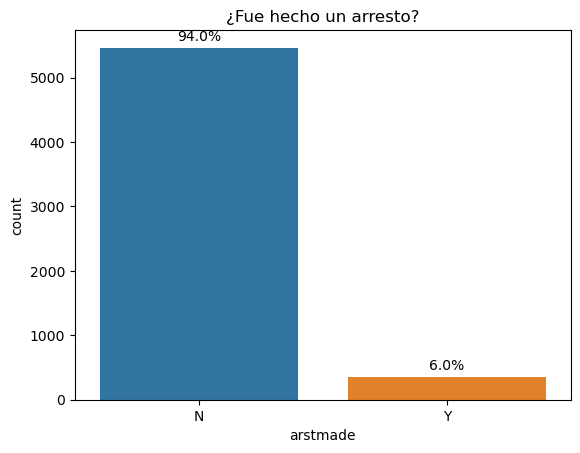

In [146]:
print(df_2009["arstmade"].value_counts().to_frame())

ax = sns.countplot(x=df_2009["arstmade"])
for p in ax.patches:
    height = p.get_height()
    ax.annotate("{:.1f}%".format(height*100/df_2009["arstmade"].shape[0]),
                xy=(p.get_x()+p.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center", va="bottom")
plt.title("¿Fue hecho un arresto?");

Se puede ver un gran desbalance en los datos, entre cuando se realizó un arresto y cuando No.

* **Se estudia el patrón de datos perdidos:**

Este código devuelve una lista de los nombres de las columnas de un marco de datos (df_2009) que contienen valores faltantes (NaN). Esto se logra primero obteniendo una matriz booleana que indica si hay valores faltantes en cada columna, luego seleccionando los nombres de las columnas correspondientes a las columnas con valores faltantes y finalmente convirtiendo la selección en una lista.

In [147]:
# df_2009.columns[df_2009.isna().any()].tolist()
df_2009.isnull().sum().sort_values(ascending=True)

year        0
race        0
sex         0
offshld     0
offverb     0
           ..
othrweap    0
machgun     0
knifcuti    0
pf_other    0
detailcm    0
Length: 111, dtype: int64

In [148]:
df_2010.isnull().sum().sort_values(ascending=True)

year        0
offshld     0
offverb     0
rf_bulg     0
rf_furt     0
           ..
knifcuti    0
asltweap    0
pf_pepsp    0
premname    1
stinter     1
Length: 111, dtype: int64

A priori no existen valores nulos en el Dataframe, sin embargo eso no implica que puedan estar ingresados con otra codificación. Esto se verá cuando se estudie la distribución y comportamiento de cada variable.

## Parametros de modelos seleciconados:

**1. Definir el tipo de modelo a implementar para generar una predicción de arresto, así como su grilla de hiperparámetros.**

**LogisticRegression**
```python
    C: [0.01, 0.1, 1, 10, 100]
    fit_intercept: [True, False]
```
**Grilla Maquinas de Soporte Vectorial**
```python
    C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    gamma: [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    Validaciones cruzadas: 3
```

**Random Forest**
```python
    n_estimators : range(20, 1000, 50)
    max_features : None , log2 , sqrt 
```
**Boosting Machine**
```python
    learning_rate: [0.01, 0.1, 0.5],
    n_estimators: [50, 100, 500, 1000, 2000]
    subsample: [0.1, 0.5, 0.9]
```

**Estimadores Voting**

```python
    estimators = [("Logistic Regression", LogisticRegression()),
                  ("SVM", SVC()),
                  ("Random Forest", RandomForestClassifier()),
                  ("Boosting Machine", GradientBoosting())]
```

**2. Definir la recodificación del vector objetivo para generar una predicción de acción violenta en el procedimiento.**

Se genera el vector objetivo que define si el asalto realizado es violento o no. Esto, de acuerdo a los atributos correspondientes

In [149]:
arst_Y = ["pf_hands", "pf_grnd", "pf_drwep", "pf_baton", "pf_hcuff", "pf_pepsp", "pf_other", "pf_wall"]

df_2009["violent_obj"] = np.where((df_2009[arst_Y] == "Y").any(axis=1), 1 , 0)
df_2009["violent_obj"].value_counts()
print(df_2009["violent_obj"].value_counts().to_frame())
violent_atrib_2009 = df_2009[arst_Y + ["violent_obj"]]
violent_atrib_2009

   violent_obj
0         4363
1         1449


,pf_hands,pf_grnd,pf_drwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,pf_wall,violent_obj
0,N,N,N,N,N,N,N,N,0
1,N,N,N,N,N,N,N,N,0
2,N,N,N,N,N,N,N,N,0
3,N,N,N,N,N,N,N,N,0
4,N,N,N,N,N,N,N,N,0
...,...,...,...,...,...,...,...,...,...
5807,N,N,N,N,N,N,N,N,0
5808,Y,N,N,N,N,N,N,N,1
5809,N,N,N,N,N,N,N,N,0
5810,N,N,N,N,Y,N,N,N,1


In [150]:
df_2010["violent_obj"] = np.where((df_2010[arst_Y] == "Y").any(axis=1), 1 , 0)
print(df_2010["violent_obj"].value_counts().to_frame())
violent_atrib_2010 = df_2010[arst_Y + ["violent_obj"]]
violent_atrib_2010

   violent_obj
0         4563
1         1450


,pf_hands,pf_grnd,pf_drwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,pf_wall,violent_obj
0,N,N,N,N,N,N,N,N,0
1,N,N,N,N,N,N,N,N,0
2,N,N,N,N,N,N,N,Y,1
3,N,N,N,N,N,N,N,N,0
4,N,N,N,N,N,N,N,N,0
...,...,...,...,...,...,...,...,...,...
6008,Y,N,N,N,N,N,N,N,1
6009,N,N,N,N,N,N,N,N,0
6010,N,N,N,N,N,N,N,N,0
6011,Y,N,N,N,N,N,N,N,1


In [151]:
violent_atrib_2009 = df_2009[["pf_hands", "pf_wall", "pf_grnd", "pf_drwep", "pf_baton", "pf_hcuff", "pf_pepsp", "pf_other", "violent_obj"]]

**3. Implementar el script preproc_nyc_sqf.py para igualar la cantidad de atributos en el benchmark.**

Importamos el archivo `preproc_nyc_sqf` y ejecutamos la funcion `create_suitable_dataframe`, donde de acuerdo a la documentación, *crea un dataframe apto para entrenamiento de acuerdo a normas básicas de limpieza de datos faltantes, transformación de etiquetas nulas en variables categóricas y crea atributos sinteticos de edad del sospechoso y conversión de distancia a sistema metrico.*

In [152]:
df_2009

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violent_obj
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,41,G,7,,1013067,0238633,CM,1,20,0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,108,J,,,1012043,0212157,CM,1,14,0
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,43,E,,,1017599,0240200,CM,1,20,0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,77,J,4,35,1002625,0183442,CM,1,24,0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,110,H,,,1024535,0209890,CM,1,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,2009,52,3719,3282009,210,A,O,P,1.0,ASSAULT,...,52,A,,,1009910,0255837,CM,1,9,0
5808,2009,79,15751,9292009,2008,A,O,P,3.0,CPW,...,79,F,17,,1001545,0192836,CM,1,20,1
5809,2009,69,3024,6262009,1937,1,O,P,1.0,FEL,...,69,B,,,1012860,0174682,CM,1,85,0
5810,2009,76,1303,3102009,59,1,O,H,1.0,CPM MISD PSA#771,...,76,A,10,,0981820,0185424,CM,1,27,1


In [153]:
df_2009["origen"] = "2009"
df_2010["origen"] = "2010"

In [154]:
print(df_2009.shape, df_2010.shape)

(5812, 113) (6013, 113)


Se concatenan ambos dataframe para mayor facilidad de trabajo

In [155]:
df_complete = pd.concat([df_2009.reset_index(), df_2010.reset_index()], axis=0).drop(columns="index")

In [156]:
df_complete

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violent_obj,origen
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,G,7,,1013067,0238633,CM,1,20,0,2009
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,J,,,1012043,0212157,CM,1,14,0,2009
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,E,,,1017599,0240200,CM,1,20,0,2009
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,J,4,35,1002625,0183442,CM,1,24,0,2009
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,H,,,1024535,0209890,CM,1,20,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2.0,MISD,...,I,,,989382,155162,CM,1,20,1,2010
6009,2010,75,15797,7302010,10,A,O,P,1.0,ROBBERY,...,A,,,1012757,186018,CM,1,85,0,2010
6010,2010,123,830,4302010,1630,A,O,P,3.0,GLA,...,E,,,933868,138600,CM,1,46,0,2010
6011,2010,115,13122,11232010,2100,1,O,P,1.0,FELONY,...,E,,,1014722,214388,CM,1,85,1,2010


In [157]:
import preproc_nyc_sqf

df_complete_1 = preproc_nyc_sqf.create_suitable_dataframe(df_complete)
df_complete_2 = df_complete_1[0]


['violent_obj', 'perobs']


In [158]:
df_complete_2.shape

(9383, 77)

Se binariza el vector objetivo apra poder analizar resultados mediante curva ROC

In [159]:
df_complete_2["violent_obj"] = np.where((df_complete_2[arst_Y] == "Y").any(axis=1), 1 , 0)

In [160]:
df_complete_2_dummies = pd.get_dummies(df_complete_2, drop_first=True, prefix_sep="_")


In [161]:
df_complete_2_dummies.rename(columns = {"origen_2010":"origen"}, inplace = True)
df_complete_2_dummies


,month,meters,violent_obj,recstat_A,inout_O,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_P,typeofid_R,...,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,linecm_1,origen
0,4,1.798320,0,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,10,1.920240,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,1.676400,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1.767840,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,1.557528,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,6,1.706880,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
6008,9,1.554480,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
6009,7,1.737360,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
6011,11,1.557528,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1


Se generan las muestras de entrenamiento y prueba

In [162]:
clean_pf = list(df_complete_2_dummies.filter(regex="pf").columns) + ["violent_obj"]

X_train = df_complete_2_dummies[df_complete_2_dummies["origen"] == 0].drop(columns =clean_pf,  axis=1)
X_test = df_complete_2_dummies[df_complete_2_dummies["origen"] == 1].drop(columns =clean_pf, axis=1)
y_train = df_complete_2_dummies["violent_obj"][df_complete_2_dummies["origen"] == 0]
y_test = df_complete_2_dummies["violent_obj"][df_complete_2_dummies["origen"] == 1]

In [163]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4636, 179) (4747, 179) (4636,) (4747,)


Definimos las grillas de parámetros para los modelos a implementar

In [164]:
parametros_SVC = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                  "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

parametros_NB = {"alpha": [0.5, 1, 2]}

parametros_GB = {"learning_rate": [0.01, 0.1, 0.5],
                 "n_estimators": [50, 100, 500, 1000, 2000],
                 "subsample": [0.1 ,0.5, 0.9]}

parametros_LG = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                 "fit_intercept": [True, False]}

parametros_RF = {"n_estimators" : range(20, 1000, 200), 
                 "max_features" : [None, "log2", "sqrt"]}

## Modelo 1 - Arresto: Logistic Regression

In [165]:
grilla_LG = GridSearchCV(LogisticRegression(), param_grid=parametros_LG, cv=3, verbose=5)
grilla_LG_fit = grilla_LG.fit(X_train, y_train)
y_LG_predict = grilla_LG_fit.best_estimator_.predict(X_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END ......C=0.0001, fit_intercept=True;, score=0.755 total time=   0.0s
[CV 2/3] END ......C=0.0001, fit_intercept=True;, score=0.756 total time=   0.0s
[CV 3/3] END ......C=0.0001, fit_intercept=True;, score=0.756 total time=   0.0s
[CV 1/3] END .....C=0.0001, fit_intercept=False;, score=0.755 total time=   0.0s
[CV 2/3] END .....C=0.0001, fit_intercept=False;, score=0.756 total time=   0.0s
[CV 3/3] END .....C=0.0001, fit_intercept=False;, score=0.756 total time=   0.0s
[CV 1/3] END .......C=0.001, fit_intercept=True;, score=0.755 total time=   0.0s
[CV 2/3] END .......C=0.001, fit_intercept=True;, score=0.756 total time=   0.0s
[CV 3/3] END .......C=0.001, fit_intercept=True;, score=0.756 total time=   0.0s
[CV 1/3] END ......C=0.001, fit_intercept=False;, score=0.755 total time=   0.0s
[CV 2/3] END ......C=0.001, fit_intercept=False;, score=0.756 total time=   0.0s
[CV 3/3] END ......C=0.001, fit_intercept=False;

In [166]:
print("Mejores parámetros: ", grilla_LG.best_params_)
print("Mejor puntaje     : ", grilla_LG.best_score_)

Mejores parámetros:  {'C': 0.01, 'fit_intercept': True}
Mejor puntaje     :  0.7653150908981804


In [167]:
print(classification_report(y_test, y_LG_predict))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3643
           1       0.60      0.12      0.20      1104

    accuracy                           0.78      4747
   macro avg       0.69      0.55      0.54      4747
weighted avg       0.74      0.78      0.72      4747



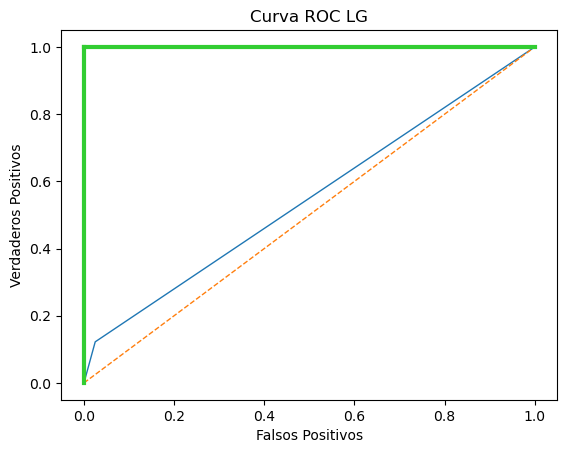

In [168]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test, y_LG_predict)

plt.title("Curva ROC LG")
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c="limegreen", lw=3), plt.plot([1, 1] , c="limegreen", lw=3)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos");

## Modelo 2 - Arresto: Maquinas de Soporte Vectorial

In [169]:
grilla_SVC = GridSearchCV(SVC(), param_grid=parametros_SVC, cv=3, verbose=5)
grilla_SVC.fit(X_train, y_train)
y_SVC_predict = grilla_SVC.best_estimator_.predict(X_test)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV 1/3] END .............C=0.0001, gamma=1e-05;, score=0.755 total time=   0.5s
[CV 2/3] END .............C=0.0001, gamma=1e-05;, score=0.756 total time=   0.5s
[CV 3/3] END .............C=0.0001, gamma=1e-05;, score=0.756 total time=   0.5s
[CV 1/3] END ............C=0.0001, gamma=0.0001;, score=0.755 total time=   0.5s
[CV 2/3] END ............C=0.0001, gamma=0.0001;, score=0.756 total time=   0.5s
[CV 3/3] END ............C=0.0001, gamma=0.0001;, score=0.756 total time=   0.5s
[CV 1/3] END .............C=0.0001, gamma=0.001;, score=0.755 total time=   0.5s
[CV 2/3] END .............C=0.0001, gamma=0.001;, score=0.756 total time=   0.5s
[CV 3/3] END .............C=0.0001, gamma=0.001;, score=0.756 total time=   0.5s
[CV 1/3] END ..............C=0.0001, gamma=0.01;, score=0.755 total time=   0.5s
[CV 2/3] END ..............C=0.0001, gamma=0.01;, score=0.756 total time=   0.5s
[CV 3/3] END ..............C=0.0001, gamma=0.01

In [170]:
print("Mejores parámetros: ", grilla_SVC.best_params_)
print("Mejor puntaje     : ", grilla_SVC.best_score_)

Mejores parámetros:  {'C': 10, 'gamma': 0.01}
Mejor puntaje     :  0.7674734255223837


In [171]:
print(classification_report(y_test, y_SVC_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.56      0.22      0.32      1104

    accuracy                           0.78      4747
   macro avg       0.68      0.59      0.59      4747
weighted avg       0.75      0.78      0.74      4747



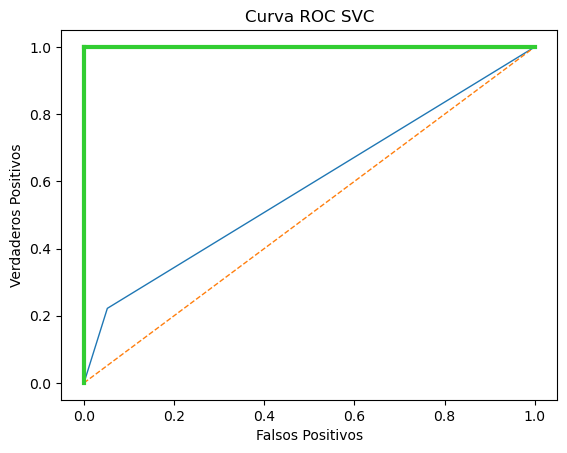

In [172]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test, y_SVC_predict)
plt.title("Curva ROC SVC")
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c="limegreen", lw=3), plt.plot([1, 1] , c="limegreen", lw=3)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos");

## Modelo 3 - Arresto: Random Forest

In [173]:
grilla_RF = GridSearchCV(RandomForestClassifier(), param_grid=parametros_RF, cv=2, verbose=1)
grilla_RF_fit = grilla_RF.fit(X_train, y_train)
y_RF_predict = grilla_RF_fit.best_estimator_.predict(X_test)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


In [174]:
print("Mejores parámetros: ", grilla_RF.best_params_)
print("Mejor puntaje     : ", grilla_RF.best_score_)

Mejores parámetros:  {'max_features': 'sqrt', 'n_estimators': 220}
Mejor puntaje     :  0.7732959447799828


In [175]:
print(classification_report(y_test, y_RF_predict))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3643
           1       0.56      0.18      0.27      1104

    accuracy                           0.78      4747
   macro avg       0.68      0.57      0.57      4747
weighted avg       0.74      0.78      0.73      4747



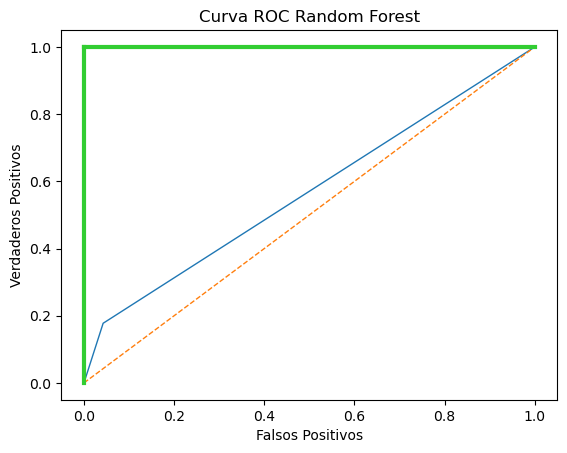

In [176]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test, y_RF_predict)
plt.title("Curva ROC Random Forest")
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c="limegreen", lw=3), plt.plot([1, 1] , c="limegreen", lw=3)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos");

## Modelo 4 - Arresto : Gradient Boosting Classifier

In [177]:
grilla_GB = GridSearchCV(GradientBoostingClassifier(), param_grid=parametros_GB, cv=2, n_jobs=-1, verbose=1)
grilla_GB_fit = grilla_GB.fit(X_train, y_train)
y_GB_predict = grilla_GB_fit.best_estimator_.predict(X_test)

Fitting 2 folds for each of 45 candidates, totalling 90 fits


In [178]:
print("Mejores parámetros: ", grilla_GB.best_params_)
print("Mejor puntaje     : ", grilla_GB.best_score_)

Mejores parámetros:  {'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 0.5}
Mejor puntaje     :  0.7689818809318378


In [179]:
print(classification_report(y_test, y_GB_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.55      0.19      0.29      1104

    accuracy                           0.78      4747
   macro avg       0.67      0.57      0.58      4747
weighted avg       0.74      0.78      0.73      4747



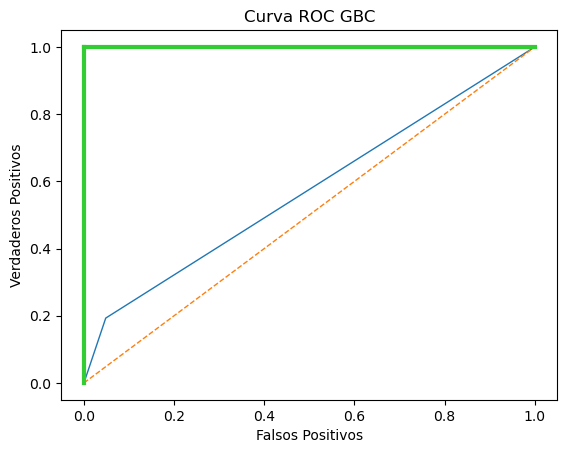

In [180]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test, y_GB_predict)
plt.title("Curva ROC GBC")
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c="limegreen", lw=3), plt.plot([1, 1] , c="limegreen", lw=3)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos");

## Modelo 5 - Arresto : Naive Bayes

In [181]:
grilla_NB = GridSearchCV(MultinomialNB(), param_grid=parametros_NB, cv=5, verbose=1)
grilla_NB.fit(X_train, y_train)
y_NB_predict = grilla_NB.best_estimator_.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [182]:
print('Mejores parámetros: ', grilla_NB.best_params_)
print('Mejor puntaje     : ', grilla_NB.best_score_)

Mejores parámetros:  {'alpha': 0.5}
Mejor puntaje     :  0.7506491091024068


In [183]:
print(classification_report(y_test, y_NB_predict))

              precision    recall  f1-score   support

           0       0.95      0.51      0.67      3643
           1       0.36      0.90      0.52      1104

    accuracy                           0.60      4747
   macro avg       0.65      0.71      0.59      4747
weighted avg       0.81      0.60      0.63      4747



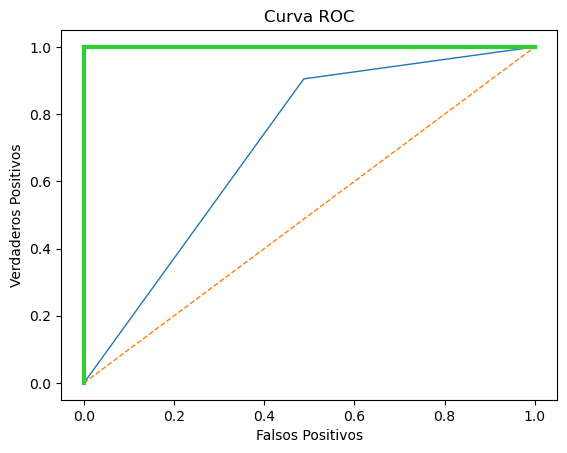

In [184]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test, y_NB_predict)

plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

## Modelo 6 - Arresto : Voting Classifier

In [185]:
estimators = [("Logistic Regression", grilla_LG.best_estimator_),
              ("SVM", grilla_SVC.best_estimator_),
              ("Random Forest", grilla_RF.best_estimator_),
              ("Boosting Machine", grilla_GB.best_estimator_),
              ("Naive Bayes", grilla_NB.best_estimator_)]

modelo_VC = VotingClassifier(estimators)
modelo_VC_fit = modelo_VC.fit(X_train, y_train)
y_VC_predict = modelo_VC_fit.predict(X_test)

In [186]:
modelo_VC_fit.estimators

[('Logistic Regression', LogisticRegression(C=0.01)),
 ('SVM', SVC(C=10, gamma=0.01)),
 ('Random Forest',
  RandomForestClassifier(max_features='sqrt', n_estimators=220)),
 ('Boosting Machine',
  GradientBoostingClassifier(n_estimators=50, subsample=0.5)),
 ('Naive Bayes', MultinomialNB(alpha=0.5))]

In [187]:
print(classification_report(y_test, y_VC_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.58      0.21      0.30      1104

    accuracy                           0.78      4747
   macro avg       0.69      0.58      0.59      4747
weighted avg       0.75      0.78      0.74      4747



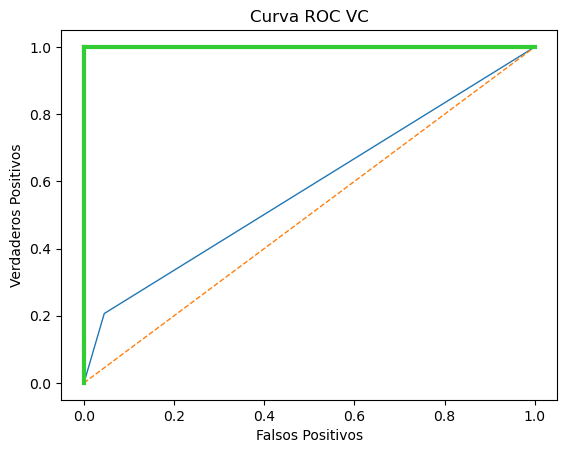

In [188]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test, y_VC_predict)

plt.title("Curva ROC VC")
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c="limegreen", lw=3), plt.plot([1, 1] , c="limegreen", lw=3)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos");

In [189]:
import lec10_graphs as lec10

Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      3643
           1       0.60      0.12      0.20      1104

    accuracy                           0.78      4747
   macro avg       0.69      0.55      0.54      4747
weighted avg       0.74      0.78      0.72      4747

SVM
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.56      0.22      0.32      1104

    accuracy                           0.78      4747
   macro avg       0.68      0.59      0.59      4747
weighted avg       0.75      0.78      0.74      4747

Random Forest
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      3643
           1       0.56      0.18      0.27      1104

    accuracy                           0.78      4747
   macro avg       0.67      0.57      0.57      4747
weighted avg       0.74      0.78

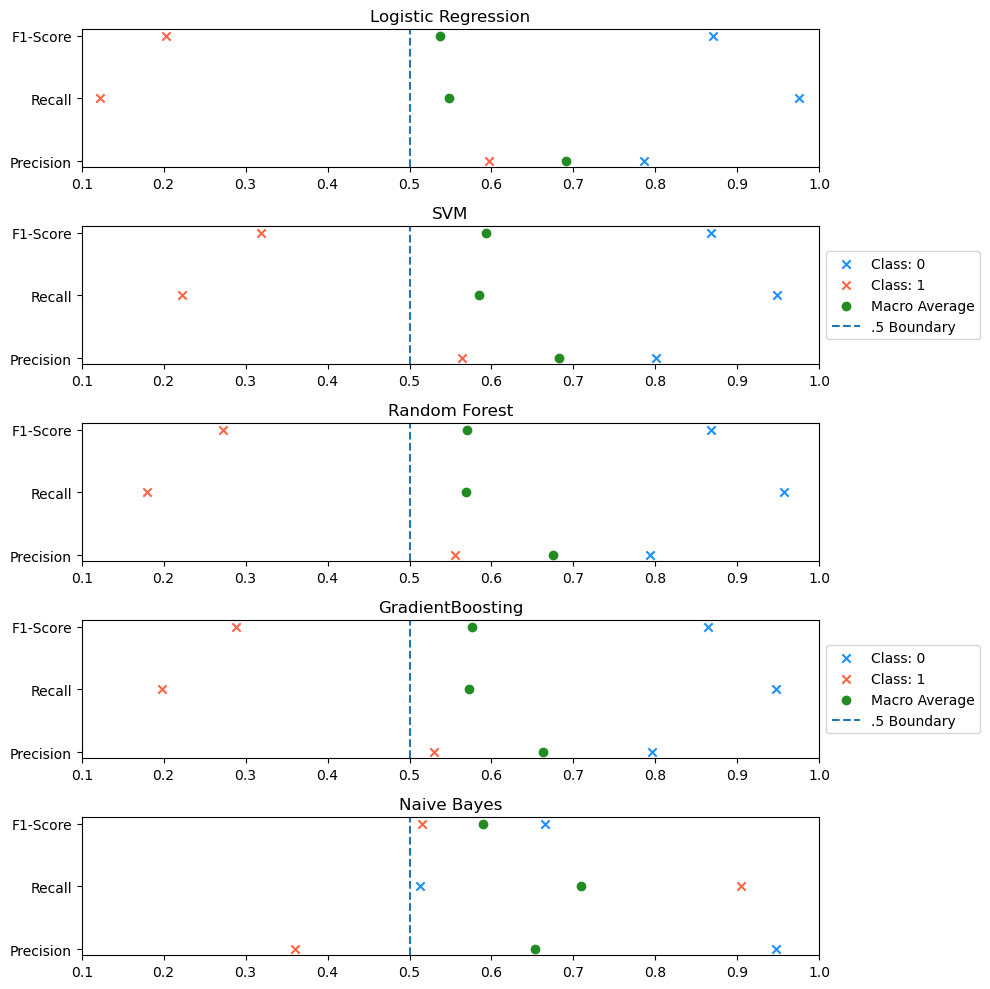

In [190]:
estimators = [("Logistic Regression", grilla_LG.best_estimator_),
              ("SVM", grilla_SVC.best_estimator_),
              ("Random Forest", grilla_RF.best_estimator_),
              ("GradientBoosting", grilla_GB.best_estimator_),
              ("Naive Bayes", grilla_NB.best_estimator_)
              ]

plt.figure(figsize=(10, 10))

for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].fit(X_train, y_train).predict(X_test)
    lec10.plot_classification_report(y_test, class_pred)
    print(f"{value[0]}\n", classification_report(y_test, class_pred))        ## Agregué esta linea apra ver los valores numericos especificos
    plt.axvline(.5, label=".5 Boundary", linestyle="--")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

Hasta este punto, y en base a los modelos ya entrenados, se considera que los mejores modelos son GradientBoosting y SVM.

Es interesante tambien comentar que NB es el unico modelo que predice mejor la clase 1 que la 0

## Iteración - Random Forest con feature importance

Se analizan cuales son los atributos mas importantes

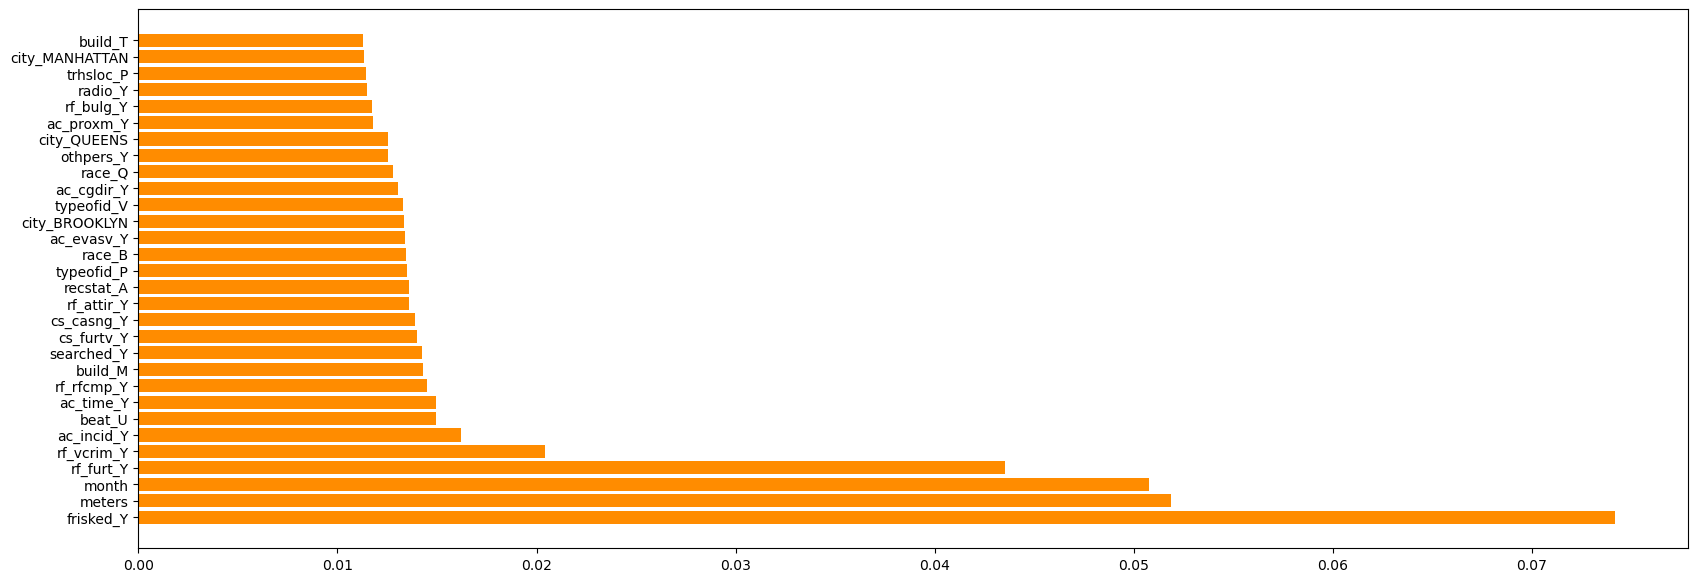

In [191]:
#importancia atributos random forest
plt.figure(figsize=(20,7))
importancias_RF = pd.DataFrame({"Atributo":X_train.columns, "Importancia": grilla_RF_fit.best_estimator_.feature_importances_})
carc_imp = importancias_RF.sort_values(by="Importancia", ascending=False)[:30]
plt.barh(y=carc_imp["Atributo"],width=carc_imp["Importancia"],height=0.8,color='darkorange');

Se crea un nuevo dataframe con los 30 atributos mas importentes, más el vector objetivo y la columna para filtrar por fecha

In [192]:
df_complete_2_dummies_30 = df_complete_2_dummies[carc_imp["Atributo"]]
df_complete_2_dummies_30["origen"] = df_complete_2_dummies["origen"]
df_complete_2_dummies_30["violent_obj"] = df_complete_2_dummies["violent_obj"]
df_complete_2_dummies_30

,frisked_Y,meters,month,rf_furt_Y,rf_vcrim_Y,ac_incid_Y,beat_U,ac_time_Y,rf_rfcmp_Y,build_M,...,othpers_Y,city_QUEENS,ac_proxm_Y,rf_bulg_Y,radio_Y,trhsloc_P,city_MANHATTAN,build_T,origen,violent_obj
0,0,1.798320,4,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,0,0,0
2,1,1.920240,10,1,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.676400,12,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5,1,1.767840,5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,1,1.557528,11,1,0,1,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,0,1.706880,6,0,0,1,1,1,0,0,...,1,1,0,0,0,1,0,1,1,0
6008,1,1.554480,9,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
6009,1,1.737360,7,1,0,0,1,1,1,1,...,0,0,0,0,0,1,0,0,1,0
6011,1,1.557528,11,1,0,0,1,1,1,1,...,0,1,0,0,0,1,0,0,1,1


In [193]:
X_train_30_toRF = df_complete_2_dummies_30[df_complete_2_dummies_30["origen"] == 0].drop(["violent_obj", "origen"], axis=1)
X_test_30_toRF = df_complete_2_dummies_30[df_complete_2_dummies_30["origen"] == 1].drop(["violent_obj", "origen"], axis=1)
y_train_30_toRF = df_complete_2_dummies_30["violent_obj"][df_complete_2_dummies_30["origen"] == 0]
y_test_30_toRF = df_complete_2_dummies_30["violent_obj"][df_complete_2_dummies_30["origen"] == 1]

In [194]:
print(X_train_30_toRF.shape, X_test_30_toRF.shape, y_train_30.shape, y_test_30_toRF.shape)

(4636, 30) (4747, 30) (4636,) (4747,)


In [195]:
grilla_RF_30 = GridSearchCV(RandomForestClassifier(), param_grid=parametros_RF, cv=3, verbose=1)
grilla_RF_fit_30 = grilla_RF_30.fit(X_train_30_toRF, y_train_30_toRF)
y_RF_predict_30 = grilla_RF_fit_30.predict(X_test_30_toRF)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [196]:
print('Mejores parámetros: ', grilla_RF_fit_30.best_params_)
print('Mejor puntaje     : ', grilla_RF_fit_30.best_score_)


Mejores parámetros:  {'max_features': 'log2', 'n_estimators': 620}
Mejor puntaje     :  0.772647790658567


In [197]:
print(classification_report(y_test_30_toRF, y_RF_predict_30))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3643
           1       0.49      0.24      0.32      1104

    accuracy                           0.76      4747
   macro avg       0.64      0.58      0.59      4747
weighted avg       0.73      0.76      0.73      4747



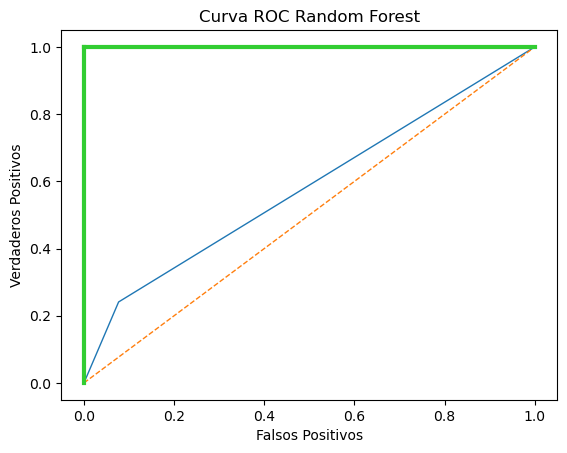

In [198]:
# Se grafica la curva ROC 
false_positive, true_positive, threshold = roc_curve(y_test_30, y_RF_predict_30)

plt.title('Curva ROC Random Forest')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      3643
           1       0.60      0.12      0.20      1104

    accuracy                           0.78      4747
   macro avg       0.69      0.55      0.54      4747
weighted avg       0.74      0.78      0.72      4747

SVM
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.56      0.22      0.32      1104

    accuracy                           0.78      4747
   macro avg       0.68      0.59      0.59      4747
weighted avg       0.75      0.78      0.74      4747

Random Forest
               precision    recall  f1-score   support

           0       0.79      0.95      0.87      3643
           1       0.55      0.18      0.27      1104

    accuracy                           0.77      4747
   macro avg       0.67      0.57      0.57      4747
weighted avg       0.74      0.77

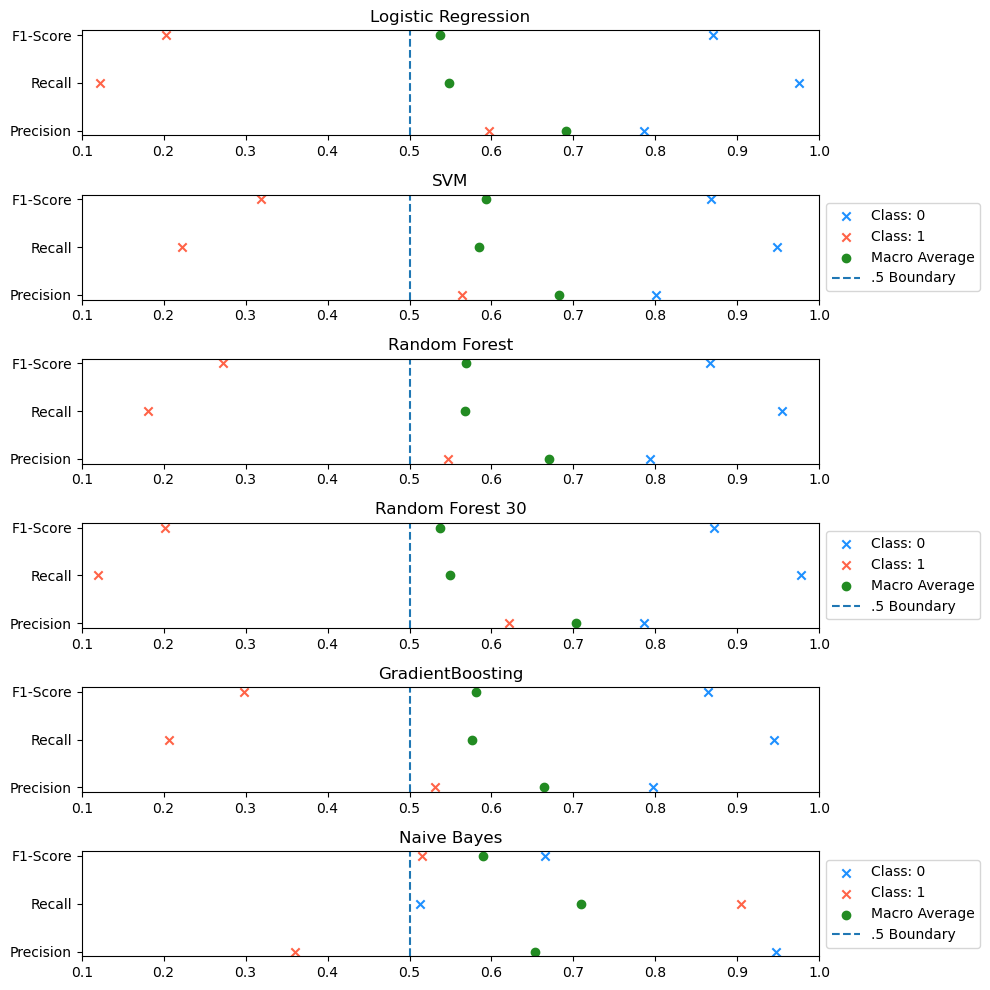

In [199]:
estimators = [("Logistic Regression", grilla_LG.best_estimator_),
              ("SVM", grilla_SVC.best_estimator_),
              ("Random Forest", grilla_RF.best_estimator_),
              ("Random Forest 30", grilla_RF_30.best_estimator_),
              ("GradientBoosting", grilla_GB.best_estimator_),
              ("Naive Bayes", grilla_NB.best_estimator_)
              ]

plt.figure(figsize=(10, 10))

for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].fit(X_train, y_train).predict(X_test)
    lec10.plot_classification_report(y_test, class_pred)
    print(f"{value[0]}\n", classification_report(y_test, class_pred))        ## Agregué esta linea apra ver los valores numericos especificos
    plt.axvline(.5, label=".5 Boundary", linestyle="--")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Iteración - Gradient Boosting con feature importance

Se analizan cuales son los atributos mas importantes

<BarContainer object of 30 artists>

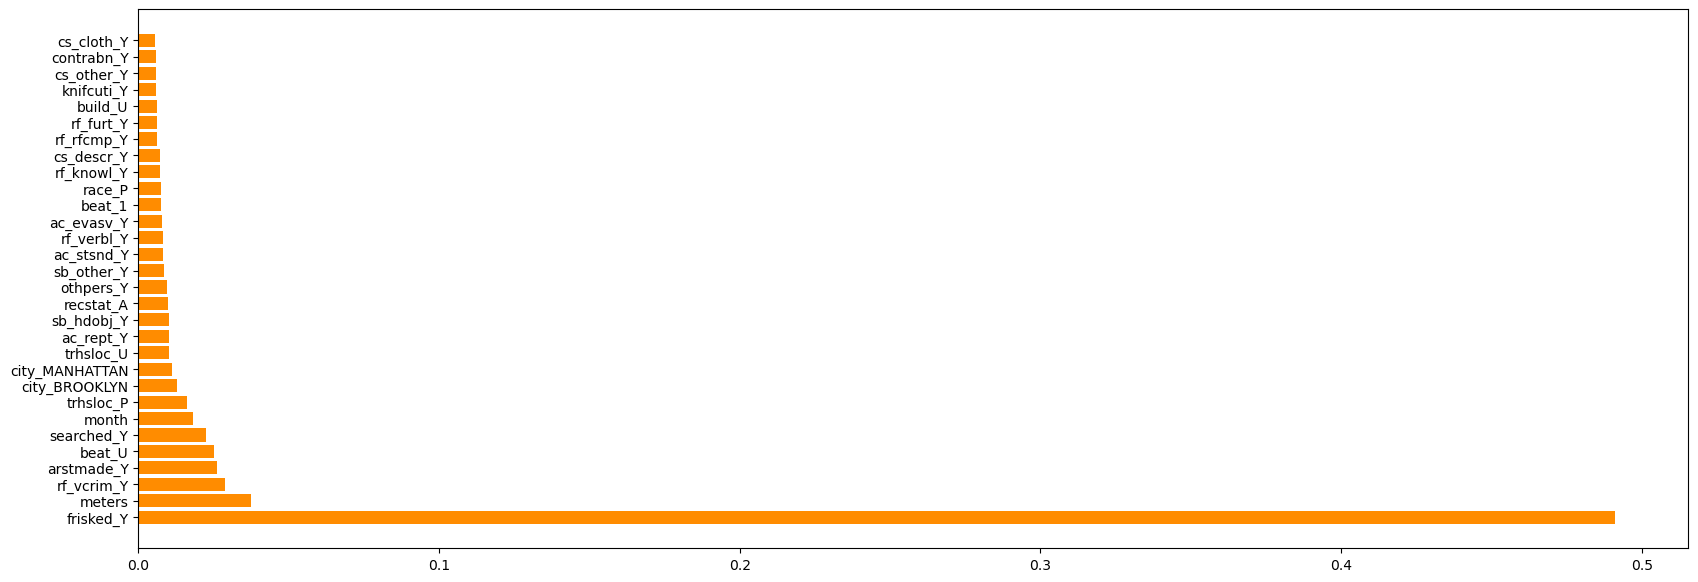

In [200]:
#importancia atributos gradient boosting
plt.figure(figsize=(20,7))
importancias_GB = pd.DataFrame({"Atributo":X_train.columns, "Importancia": grilla_GB_fit.best_estimator_.feature_importances_})
carc_imp = importancias_GB.sort_values(by="Importancia", ascending=False)[:30]
plt.barh(y=carc_imp["Atributo"],width=carc_imp["Importancia"],height=0.8,color='darkorange')

Se crea un nuevo dataframe con los 30 atributos mas importentes, más el vector objetivo y la columna para filtrar por fecha

In [201]:
df_complete_2_dummies_30 = df_complete_2_dummies[carc_imp["Atributo"]]
df_complete_2_dummies_30["origen"] = df_complete_2_dummies["origen"]
df_complete_2_dummies_30["violent_obj"] = df_complete_2_dummies["violent_obj"]
df_complete_2_dummies_30

,frisked_Y,meters,rf_vcrim_Y,arstmade_Y,beat_U,searched_Y,month,trhsloc_P,city_BROOKLYN,city_MANHATTAN,...,cs_descr_Y,rf_rfcmp_Y,rf_furt_Y,build_U,knifcuti_Y,cs_other_Y,contrabn_Y,cs_cloth_Y,origen,violent_obj
0,0,1.798320,0,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.920240,0,0,1,0,10,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.676400,0,0,0,0,12,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1.767840,0,0,0,0,5,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,1,1.557528,0,0,1,1,11,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,0,1.706880,0,0,1,0,6,1,0,0,...,0,0,0,0,0,1,0,0,1,0
6008,1,1.554480,0,0,1,0,9,0,1,0,...,0,0,1,0,0,0,0,0,1,1
6009,1,1.737360,0,0,1,0,7,1,1,0,...,0,1,1,0,0,0,0,0,1,0
6011,1,1.557528,0,0,1,0,11,1,0,0,...,0,1,1,0,0,0,0,0,1,1


In [202]:
X_train_30_toGB = df_complete_2_dummies_30[df_complete_2_dummies_30["origen"] == 0].drop(["violent_obj", "origen"], axis=1)
X_test_30_toGB = df_complete_2_dummies_30[df_complete_2_dummies_30["origen"] == 1].drop(["violent_obj", "origen"], axis=1)
y_train_30_toGB = df_complete_2_dummies_30["violent_obj"][df_complete_2_dummies_30["origen"] == 0]
y_test_30_toGB = df_complete_2_dummies_30["violent_obj"][df_complete_2_dummies_30["origen"] == 1]

In [203]:
print(X_train_30_toGB.shape, X_test_30_toGB.shape, y_train_30_toGB.shape, y_test_30_toGB.shape)

(4636, 30) (4747, 30) (4636,) (4747,)


In [204]:
grilla_GB_30 = GridSearchCV(GradientBoostingClassifier(), param_grid=parametros_GB, cv=2, n_jobs=-1, verbose=1)
grilla_GB_30_fit = grilla_GB.fit(X_train_30_toGB, y_train_30_toGB)
y_GB_30_predict = grilla_GB_fit.best_estimator_.predict(X_test_30_toGB)

Fitting 2 folds for each of 45 candidates, totalling 90 fits


In [205]:
print("Mejores parámetros: ", grilla_GB.best_params_)
print("Mejor puntaje     : ", grilla_GB.best_score_)

Mejores parámetros:  {'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.5}
Mejor puntaje     :  0.7713546160483176


In [206]:
print(classification_report(y_test_30_toGB, y_GB_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.55      0.19      0.29      1104

    accuracy                           0.78      4747
   macro avg       0.67      0.57      0.58      4747
weighted avg       0.74      0.78      0.73      4747



Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      3643
           1       0.60      0.12      0.20      1104

    accuracy                           0.78      4747
   macro avg       0.69      0.55      0.54      4747
weighted avg       0.74      0.78      0.72      4747

SVM
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      3643
           1       0.56      0.22      0.32      1104

    accuracy                           0.78      4747
   macro avg       0.68      0.59      0.59      4747
weighted avg       0.75      0.78      0.74      4747

Random Forest
               precision    recall  f1-score   support

           0       0.79      0.95      0.87      3643
           1       0.55      0.19      0.28      1104

    accuracy                           0.78      4747
   macro avg       0.67      0.57      0.57      4747
weighted avg       0.74      0.78

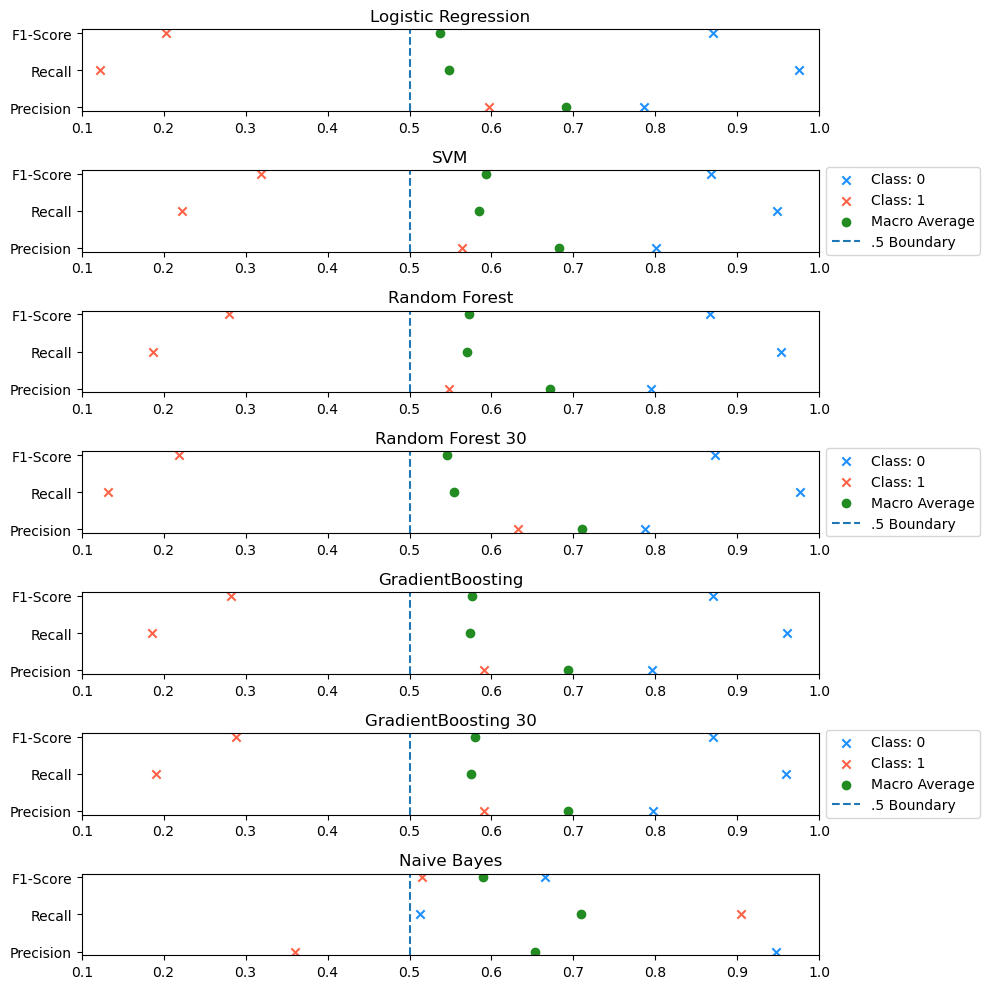

In [207]:
estimators = [("Logistic Regression", grilla_LG.best_estimator_),
              ("SVM", grilla_SVC.best_estimator_),
              ("Random Forest", grilla_RF.best_estimator_),
              ("Random Forest 30", grilla_RF_30.best_estimator_),
              ("GradientBoosting", grilla_GB.best_estimator_),
              ("GradientBoosting 30", grilla_GB_30_fit.best_estimator_),
              ("Naive Bayes", grilla_NB.best_estimator_)
              ]

plt.figure(figsize=(10, 10))

for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].fit(X_train, y_train).predict(X_test)
    lec10.plot_classification_report(y_test, class_pred)
    print(f"{value[0]}\n", classification_report(y_test, class_pred))        ## Agregué esta linea apra ver los valores numericos especificos
    plt.axvline(.5, label=".5 Boundary", linestyle="--")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Conclusión

Una vez seleccionadas las 30 variables más influyentes para RF y GB, podemos notar que no hay una mejora sustancial con respecto a los calculos anteriores. No obstante, al reducir la cantidad de variables, obtenemos un proceso mas economico computacionalmente hablando, por lo que se asume que los mejores modelos serian **RF** y **GB** con las 30 variables mas imporantes.

Como comentario adicional, se podria recomendar **Naive Bayes** si se desea una menor tasa de falsos negativos, ya que es el unico modelo donde el recall para la clase 1 (arresto positivo) dio mas alto (recordar que el recall mide la fracción de los elementos positivos reales que fueron correctamente identificados por el modelo).

In [208]:
import pickle

In [209]:
#Modelo serializado
pickle.dump(grilla_GB_30_fit, open('grilla_GB_30_fit.sav', 'wb'))
pickle.dump(grilla_RF_fit_30, open('grilla_RF_30_fit.sav', 'wb'))
pickle.dump(X_train_30_toGB, open('X_train_toGB.sav', 'wb'))
pickle.dump(X_test_30_toGB, open('X_test_toGB.sav', 'wb'))
pickle.dump(y_train_30_toGB, open('y_train_toGB.sav', 'wb'))
pickle.dump(y_test_30_toGB, open('y_test_toGB.sav', 'wb'))
pickle.dump(X_train_30_toRF, open('X_train_toRF.sav', 'wb'))
pickle.dump(X_test_30_toRF, open('X_test_toRF.sav', 'wb'))
pickle.dump(y_train_30_toRF, open('y_train_toRF.sav', 'wb'))
pickle.dump(y_test_30_toRF, open('y_test_toRF.sav', 'wb'))